In [4]:
from utils.spark_utils import spark_session


In [2]:
import sys
from pyspark.sql import SparkSession

sys.path.insert(0,"../utils.zip")
#from utils.spark_utils import spark_session

spark = spark_session()

from utils.gf_utils import *
from utils.df_utils import *
from utils.draw_utils import *
from utils.spark_utils import *

In [5]:
## magic for matplot draw in notebook

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

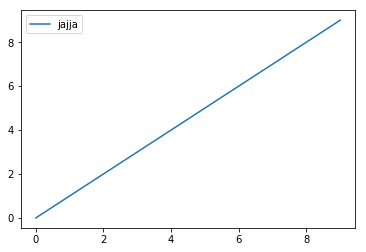

In [6]:
plt.figure()

plt.plot(np.arange(10),label= "jajja")
plt.legend()
plt.show()

In [7]:

gf = None

spark = spark_session() 

ed_2 = spark.read.parquet("../saved_graph/edges_prueba")
    
ed_2.show()
    

ver_2 = spark.read.parquet("../saved_graph/vert_prueba")
    
ver_2.show()
    
    
    
    

+--------------------+--------------------+-----------+
|                 src|                 dst|edge_weight|
+--------------------+--------------------+-----------+
|[jiubang.fastestf...|[emoji.keyboard.e...|          0|
|[emoji.keyboard.e...|[enflick.android....|          0|
|[enflick.android....|[emoji.keyboard.e...|          1|
|[emoji.keyboard.t...|[emoji.keyboard.e...|          1|
|[emoji.keyboard.e...|[kitkatandroid.ke...|          0|
|[kitkatandroid.ke...|[emoji.keyboard.e...|          0|
|[latininput.keybo...|[emoji.keyboard.e...|          1|
|[emoji.keyboard.e...|[latininput.keybo...|          0|
|[emoji.keyboard.t...|[jiubang.fastestf...|          1|
|[jiubang.fastestf...|[enflick.android....|          0|
|[enflick.android....|[jiubang.fastestf...|          1|
|[jiubang.fastestf...|[emoji.keyboard.t...|          0|
|  [jiubang.go.music]|[emoji.keyboard.e...|          1|
|[kitkatandroid.ke...|[jiubang.fastestf...|          1|
|[emoji.keyboard.e...|  [jiubang.go.music]|     

In [6]:
!PYSPARK_SUBMIT_ARGS=--packages graphframes:graphframes:0.7.0-spark2.4-s_2.11 

/bin/sh: graphframes:graphframes:0.7.0-spark2.4-s_2.11: command not found


In [8]:
spark.sparkContext.addPyFile('/Users/olaya/Desktop/spark-2.4.1-bin-hadoop2.7/jars/graphframes-assembly-0.7.1-SNAPSHOT-spark2.4.jar')


In [9]:
gf= GraphFrame(ver_2,ed_2)


In [10]:
from utils.draw_utils import *


In [11]:
draw_igraph( gf )


gf_utils draw_igraph --


In [12]:
from igraph import Graph
from igraph import plot

In [13]:
ig = Graph.TupleList( gf.edges.collect(), directed=True )

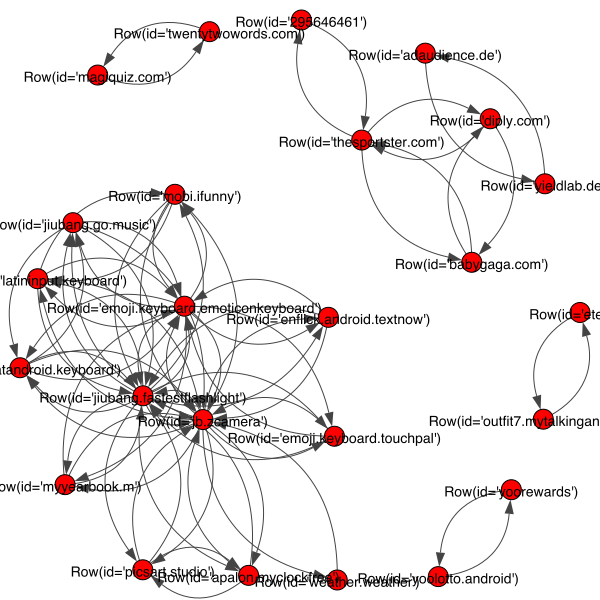

In [14]:
color_dict = {"m": "blue", "f": "pink"}
#plot(ig, layout = layout, vertex_color = [color_dict[gender] for gender in g.vs["gender"]])
layout = ig.layout("kk")
visual_style = {}
visual_style["vertex_size"] = 20
#visual_style["vertex_color"] = [color_dict[gender] for gender in ig.vs["gender"]]
visual_style["vertex_label"] = ig.vs["name"]
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in ig.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20
plot(ig, **visual_style)


#plot(ig, layout="kk")


In [15]:
ig.vs[0]
ig.vs[1].attributes()


{'name': Row(id='emoji.keyboard.emoticonkeyboard')}

In [16]:
ig.es[1].attributes()
ig.es[0]
ig.vcount()


25

In [17]:
#ig.get_edgelist()


In [18]:
ig.vertex_attributes()

['name']

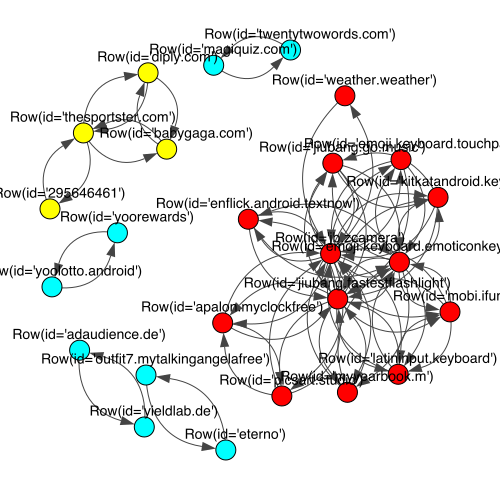

In [15]:
ig2 = Graph.TupleList( gf.edges.collect(), directed=True )
#ig2 = Graph.Erdos_Renyi(n=300, m=250)
visual_style = {}
N_vertices= ig2.vcount()

layout = ig.layout("kk")
#layout = ig.layout("fr")
#layout = layout.fruchterman.reingold
colors = ["lightgray", "cyan", "magenta", "yellow", "blue", "green", "red"]
for component in ig2.components():
  color = colors[min(6, len(component)-1)]
  for vidx in component: ig2.vs[vidx]["color"] = color
  
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = ig.vs["name"]
visual_style["vertex_label_size"] = 14 #tamaño de la letra (hay q ver como se cambia el tipo de letra)
visual_style["vertex_label_dist"] = 1 # coloco etiqueta debajo del nodo
visual_style["vertex_label_angle"] = 1 # coloco etiqueta a la derecha: 0
#visual_style["edge_width"] = [7] * (N_vertices - 1)
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in ig.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (20 * N_vertices, 20 * N_vertices)#(600,600)
#visual_style["bbox"] = (300, 300)
visual_style["margin"] = 50
plot(ig2, **visual_style)

#plot(ig2, layout="fr", vertex_label=None)
#plot(ig2, layout="kk", vertex_label=None)

In [ ]:
#tree.vs['label'] = xrange(N_vertices)
#layout = tree.layout('fr')
ig.plot(tree, name, bbox = (200 * N_vertices, 200 * N_vertices), margin = 250,
            layout = layout, edge_width = [7] * (N_vertices - 1), 
            vertex_label_dist = 0, vertex_label_size = 30, 
            vertex_size = vertex_sizes.tolist()) 

AttributeError: 'Graph' object has no attribute 'plot'

In [16]:
df = spark.read.format( "csv" ).option( "header", 'true' ).option( "delimiter", ',' ).load(
        "/Users/olaya/Documents/Master/TFM/Datos/ssp_bid_compressed_000000000499.csv.gz" )


In [17]:
df_cleaned = clean( df,"referrer_domain","user_ip" )
df_cleaned.head(5)

df_utils clean --
df-utils clean-- Calculando df_cleaned_ip


[Row(user_ip='168.28.22.61', uuid_hashed='+ofYXMQWp+wGQ1hQW6E1lgtrptQ=', useragent=None, referrer_domain='seanmalstrom.wordpress.com', ssp_domain='seanmalstrom.wordpress.com', date_time='2018-02-08 01:38:27', ip_cleaned='168.28.22.61', domain_cleaned='wordpress.com'),
 Row(user_ip='98.187.3.13', uuid_hashed='AzPCZr65TbqweiOJlCv28cQzTNI=', useragent='be2/1.0', referrer_domain='drudgereport.com', ssp_domain='drudgereport.com', date_time='2018-02-08 01:30:37', ip_cleaned='98.187.3.13', domain_cleaned='drudgereport.com'),
 Row(user_ip='45.56.154.72', uuid_hashed='EoYS32m06fAnEYw3dh/sa5JTWyM=', useragent='be2/1.0', referrer_domain='textnow.com', ssp_domain='textnow.com', date_time='2018-02-08 01:14:31', ip_cleaned='45.56.154.72', domain_cleaned='textnow.com'),
 Row(user_ip='90.197.180.231', uuid_hashed='iCWj3iLOqjz2LQEhY/i/JWX553o=', useragent=None, referrer_domain='tfl.gov.uk', ssp_domain='tfl.gov.uk', date_time='2018-02-08 01:36:53', ip_cleaned='90.197.180.231', domain_cleaned='tfl.gov.uk

In [18]:
df_count_domain = df_cleaned.groupBy("domain_cleaned").count()


In [22]:
df_top20 = df_count_domain.sort("count",ascending=False).head(20)

In [23]:
df_count_domain.sort("count",ascending=False).head(20)

[Row(domain_cleaned='yahoo.com', count=80706),
 Row(domain_cleaned='enflick.android.textnow', count=71868),
 Row(domain_cleaned='lionmobi.powerclean', count=64614),
 Row(domain_cleaned='mobi.ifunny', count=57053),
 Row(domain_cleaned='qihoo.security', count=55719),
 Row(domain_cleaned='weather.weather', count=48762),
 Row(domain_cleaned='lionmobi.battery', count=38822),
 Row(domain_cleaned='steam.photoeditor', count=38035),
 Row(domain_cleaned='429610587', count=35856),
 Row(domain_cleaned='jb.emoji.gokeyboard', count=35594),
 Row(domain_cleaned='mobileposse.com', count=33440),
 Row(domain_cleaned='jiubang.fastestflashlight', count=31455),
 Row(domain_cleaned='emoji.keyboard.emoticonkeyboard', count=30198),
 Row(domain_cleaned='picsart.studio', count=29725),
 Row(domain_cleaned='jiubang.go.music', count=27026),
 Row(domain_cleaned='jb.zcamera', count=27006),
 Row(domain_cleaned='cleanmaster.mguard', count=26812),
 Row(domain_cleaned='bambuna.podcastaddict', count=23932),
 Row(domain_cl

In [33]:
df_cleaned.show(4,False)

+--------------+----------------------------+---------+--------------------------+--------------------------+-------------------+--------------+----------------+
|user_ip       |uuid_hashed                 |useragent|referrer_domain           |ssp_domain                |date_time          |ip_cleaned    |domain_cleaned  |
+--------------+----------------------------+---------+--------------------------+--------------------------+-------------------+--------------+----------------+
|168.28.22.61  |+ofYXMQWp+wGQ1hQW6E1lgtrptQ=|null     |seanmalstrom.wordpress.com|seanmalstrom.wordpress.com|2018-02-08 01:38:27|168.28.22.61  |wordpress.com   |
|98.187.3.13   |AzPCZr65TbqweiOJlCv28cQzTNI=|be2/1.0  |drudgereport.com          |drudgereport.com          |2018-02-08 01:30:37|98.187.3.13   |drudgereport.com|
|45.56.154.72  |EoYS32m06fAnEYw3dh/sa5JTWyM=|be2/1.0  |textnow.com               |textnow.com               |2018-02-08 01:14:31|45.56.154.72  |textnow.com     |
|90.197.180.231|iCWj3iLOqjz2

In [24]:
## magic for matplot draw in notebook

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df_count_domain.plot(kind='bar',x='domain_cleaned',y='count')


AttributeError: 'DataFrame' object has no attribute 'plot'

In [26]:
df_count_domain.hist('domain_cleaned', bins = 100)


AttributeError: 'DataFrame' object has no attribute 'hist'

In [36]:
pd_cleaned= df_cleaned.toPandas() ## no se yo

Py4JJavaError: An error occurred while calling o572.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 21.0 failed 1 times, most recent failure: Lost task 0.0 in stage 21.0 (TID 244, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space
	at java.util.Arrays.copyOf(Arrays.java:3236)
	at java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:118)
	at java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:93)
	at java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:153)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:220)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:173)
	at java.io.DataOutputStream.write(DataOutputStream.java:107)
	at org.apache.spark.sql.catalyst.expressions.UnsafeRow.writeToStream(UnsafeRow.java:554)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:258)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3257)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3254)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3364)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3363)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at java.util.Arrays.copyOf(Arrays.java:3236)
	at java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:118)
	at java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:93)
	at java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:153)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:220)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:173)
	at java.io.DataOutputStream.write(DataOutputStream.java:107)
	at org.apache.spark.sql.catalyst.expressions.UnsafeRow.writeToStream(UnsafeRow.java:554)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:258)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
pd_cleaned.head()

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 49437)
Traceback (most recent call last):
  File "/Users/olaya/anaconda3/envs/fraud_36/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/olaya/anaconda3/envs/fraud_36/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/Users/olaya/anaconda3/envs/fraud_36/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/olaya/anaconda3/envs/fraud_36/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/Users/olaya/Desktop/spark-2.4.1-bin-hadoop2.7/python/pyspark/accumulators.py", line 269, in handle
    poll(accum_updates)
  File "/Users/olaya/Desktop/spark-2.4.1-bin-hadoop2.7/python/pyspark/accumulators.py", line 241, in poll
    if func

In [34]:
# numero maximo count Y, X=dominios 
pd_cleaned.date_time = pd_cleaned.to_datetime(df_cleaned.date_time)
pd_cleaned.set_index('date_time', inplace=True)

NameError: name 'pd' is not defined

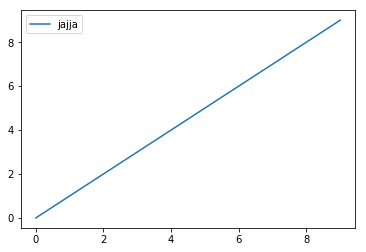

In [30]:

plt.figure()

plt.plot(np.arange(10),label= "jajja")
plt.legend()
plt.show()

In [28]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, data_frame, bins = 20, color=['red'])

ModuleNotFoundError: No module named 'pyspark_dist_explore'